## NYPD Complaint Data Historic

### Below are all the variables in the dataset, followed by its description: 
CMPLNT_NUM =  Randomly generated persistent ID for each complaint

CMPLNT_FR_DT = Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)

CMPLNT_FR_TM  = Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists)

CMPLNT_TO_DT  = Ending date of occurrence for the reported event, if exact time of occurrence is unknown

CMPLNT_TO_TM  = Ending time of occurrence for the reported event, if exact time of occurrence is unknown

ADDR_PCT_CD  =  The precinct in which the incident occurred

RPT_DT  =  Date event was reported to police

KY_CD  =  Three digit offense classification code

OFNS_DESC  =  Description of offense corresponding with key code

PD_CD  =   Three digit internal classification code (more granular than Key Code)

PD_DESC  =   Description of internal classification corresponding with PD code (more granular than Offense Description)

CRM_ATPT_CPTD_CD  =  Indicator of whether crime was successfully completed or attempted, but failed or was interrupted prematurely 

LAW_CAT_CD  =  Level of offense: felony, misdemeanor, violation

BORO_NM  =  The name of the borough in which the incident occurred

LOC_OF_OCCUR_DESC  =   Specific location of occurrence in or around the premises; inside, opposite of, front of, rear of

PREM_TYP_DESC  =  Specific description of premises; grocery store, residence, street, etc.

JURIS_DESC =  Description of the jurisdiction code

JURISDICTION_CODE =  Jurisdiction responsible for incident. Either internal, like Police(0), Transit(1), and Housing(2); or external(3), like Correction, Port Authority, etc.

PARKS_NM  =  Name of NYC park, playground or greenspace of occurrence, if applicable (state parks are not included)

HADEVELOPT =  Name of NYCHA housing development of occurrence, if applicable

HOUSING_PSA = Development Level Code

X_COORD_CD =  X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)

Y_COORD_CD  = Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)

SUSP_AGE_GROUP =  Suspect’s Age Group

SUSP_RACE =  Suspect’s Race Description

SUSP_SEX  =  Suspect’s Sex Description

TRANSIT_DISTRICT =  Transit district in which the offense occurred.

Latitude =  Midblock Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)

Longitude  =  Midblock Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)

Lat_Lon =  	 Geospatial Location Point (latitude and Longitude combined)

PATROL_BORO  =  The name of the patrol borough in which the incident occurred

STATION_NAME = Transit station name

VIC_AGE_GROUP = Victim’s Age Group

VIC_RACE = Victim’s Race Description

VIC_SEX = Victim’s Sex Description


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
!pip install squarify
import squarify
import seaborn as sns
df = pd.read_csv('NYPD_Complaint_Data_Historic.csv')

/Users/settipallis154/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (18,20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
df.head(10)

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,ADDR_PCT_CD,RPT_DT,KY_CD,OFNS_DESC,PD_CD,...,SUSP_SEX,TRANSIT_DISTRICT,Latitude,Longitude,Lat_Lon,PATROL_BORO,STATION_NAME,VIC_AGE_GROUP,VIC_RACE,VIC_SEX
0,394506329,12/31/2019,17:30:00,NaN,NaN,32.0,12/31/2019,118,DANGEROUS WEAPONS,793.0,...,NaN,NaN,40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",PATROL BORO MAN NORTH,NaN,UNKNOWN,UNKNOWN,E
1,968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,47.0,12/29/2019,113,FORGERY,729.0,...,NaN,NaN,40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
2,509837549,12/15/2019,18:45:00,NaN,NaN,109.0,12/29/2019,578,HARRASSMENT 2,638.0,...,M,NaN,40.742281,-73.819824,"(40.74228115600005, -73.81982408)",PATROL BORO QUEENS NORTH,NaN,25-44,WHITE HISPANIC,F
3,352454313,12/28/2019,01:00:00,NaN,NaN,47.0,12/28/2019,126,MISCELLANEOUS PENAL LAW,117.0,...,M,NaN,40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",PATROL BORO BRONX,NaN,UNKNOWN,UNKNOWN,E
4,248803469,09/05/2008,21:41:00,NaN,NaN,NaN,09/05/2008,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,...,NaN,NaN,40.698827,-73.938819,"(40.698827283, -73.938819047)",NaN,NaN,25-44,BLACK,M
5,293718737,12/27/2019,22:00:00,NaN,NaN,9.0,12/27/2019,107,BURGLARY,223.0,...,NaN,NaN,40.720759,-73.980466,"(40.72075882100006, -73.98046642299995)",PATROL BORO MAN SOUTH,NaN,UNKNOWN,UNKNOWN,M
6,552685226,12/27/2019,20:10:00,12/27/2019,20:15:00,79.0,12/27/2019,117,DANGEROUS DRUGS,521.0,...,NaN,NaN,40.695958,-73.937632,"(40.695958362000056, -73.93763162199998)",PATROL BORO BKLYN NORTH,NaN,UNKNOWN,UNKNOWN,E
7,134037758,12/26/2019,20:00:00,12/27/2019,07:15:00,101.0,12/27/2019,341,PETIT LARCENY,321.0,...,NaN,NaN,40.611570,-73.747365,"(40.61157006600007, -73.74736517199995)",PATROL BORO QUEENS SOUTH,NaN,25-44,WHITE HISPANIC,F
8,855385879,12/26/2019,19:57:00,NaN,NaN,44.0,12/26/2019,361,OFF. AGNST PUB ORD SENSBLTY &,639.0,...,F,NaN,40.840234,-73.917684,"(40.84023413800003, -73.91768411399994)",PATROL BORO BRONX,NaN,18-24,BLACK,F
9,241602326,12/25/2019,23:00:00,12/26/2019,14:25:00,20.0,12/26/2019,341,PETIT LARCENY,321.0,...,NaN,NaN,40.772875,-73.989542,"(40.77287456000005, -73.98954212299998)",PATROL BORO MAN NORTH,NaN,45-64,BLACK,M


In [3]:
df.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'ADDR_PCT_CD', 'RPT_DT', 'KY_CD', 'OFNS_DESC', 'PD_CD',
       'PD_DESC', 'CRM_ATPT_CPTD_CD', 'LAW_CAT_CD', 'BORO_NM',
       'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC', 'JURISDICTION_CODE',
       'PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'X_COORD_CD', 'Y_COORD_CD',
       'SUSP_AGE_GROUP', 'SUSP_RACE', 'SUSP_SEX', 'TRANSIT_DISTRICT',
       'Latitude', 'Longitude', 'Lat_Lon', 'PATROL_BORO', 'STATION_NAME',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7375993 entries, 0 to 7375992
Data columns (total 35 columns):
 #   Column             Dtype  
---  ------             -----  
 0   CMPLNT_NUM         int64  
 1   CMPLNT_FR_DT       object 
 2   CMPLNT_FR_TM       object 
 3   CMPLNT_TO_DT       object 
 4   CMPLNT_TO_TM       object 
 5   ADDR_PCT_CD        float64
 6   RPT_DT             object 
 7   KY_CD              int64  
 8   OFNS_DESC          object 
 9   PD_CD              float64
 10  PD_DESC            object 
 11  CRM_ATPT_CPTD_CD   object 
 12  LAW_CAT_CD         object 
 13  BORO_NM            object 
 14  LOC_OF_OCCUR_DESC  object 
 15  PREM_TYP_DESC      object 
 16  JURIS_DESC         object 
 17  JURISDICTION_CODE  float64
 18  PARKS_NM           object 
 19  HADEVELOPT         object 
 20  HOUSING_PSA        object 
 21  X_COORD_CD         float64
 22  Y_COORD_CD         float64
 23  SUSP_AGE_GROUP     object 
 24  SUSP_RACE          object 
 25  SUSP_SEX          

In [5]:
#(df.isnull().sum()).sort_values(ascending=False) / df.shape[0]
df.isnull().sum()/(len(df))*100

CMPLNT_NUM            0.000000
CMPLNT_FR_DT          0.008880
CMPLNT_FR_TM          0.000651
CMPLNT_TO_DT         23.104740
CMPLNT_TO_TM         23.041521
ADDR_PCT_CD           0.029366
RPT_DT                0.000000
KY_CD                 0.000000
OFNS_DESC             0.255193
PD_CD                 0.085114
PD_DESC               0.085114
CRM_ATPT_CPTD_CD      0.000095
LAW_CAT_CD            0.000000
BORO_NM               0.153593
LOC_OF_OCCUR_DESC    20.930063
PREM_TYP_DESC         0.552400
JURIS_DESC            0.000000
JURISDICTION_CODE     0.085114
PARKS_NM             99.624959
HADEVELOPT           95.298097
HOUSING_PSA          92.316831
X_COORD_CD            0.235073
Y_COORD_CD            0.235073
SUSP_AGE_GROUP       65.011382
SUSP_RACE            46.457392
SUSP_SEX             48.264796
TRANSIT_DISTRICT     97.783363
Latitude              0.235073
Longitude             0.235073
Lat_Lon               0.235073
PATROL_BORO           0.091310
STATION_NAME         97.783363
VIC_AGE_

#### Here we droping the Null values in columns of Lat, Long, BORO_NM.

In [6]:
df['Latitude'].dropna(inplace=True)
df['Longitude'].dropna(inplace=True)
df['BORO_NM'].dropna(inplace=True)


####  Created New data type to drop the null values

In [7]:
df_new = df[df['BORO_NM'] != np.nan]
df_new = df[df['Latitude'] != np.nan]
df_new = df[df['Longitude'] != np.nan]

In [8]:
#df_new['BORO_NM'].value_counts(dropna = False)
#df.drop(df[df['BORO_NM'] == np.nan].index, inplace = True)
df_new = df.dropna(subset=['BORO_NM'])
#print(df_new) 

#### checking the is there any null values present or not

In [9]:
df_new['BORO_NM'].value_counts(dropna = False)


BROOKLYN         2186681
MANHATTAN        1771637
BRONX            1599801
QUEENS           1463554
STATEN ISLAND     342991
Name: BORO_NM, dtype: int64

#### Here also drop and checking the null values count

In [10]:
df_new['Latitude'].value_counts(dropna = False)
df_new['Longitude'].value_counts(dropna = False)

-73.989282    19397
 NaN          16882
-73.776047    15477
-73.884372     9413
-73.919831     6691
              ...  
-73.993789        1
-73.798169        1
-73.931251        1
-73.812478        1
-73.866346        1
Name: Longitude, Length: 201253, dtype: int64

#### Describing the data by finding the mean, min and count values

In [11]:
df_new.describe()

,CMPLNT_NUM,ADDR_PCT_CD,KY_CD,PD_CD,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,TRANSIT_DISTRICT,Latitude,Longitude
count,7.364664e+06,7.364280e+06,7.364664e+06,7.364664e+06,7.364664e+06,7.347782e+06,7.347782e+06,163303.000000,7.347782e+06,7.347782e+06
mean,5.500326e+08,6.332109e+01,2.965796e+02,4.134552e+02,7.241146e-01,1.004848e+06,2.070930e+05,13.618997,4.073506e+01,-7.392565e+01
std,2.597786e+08,3.447955e+01,1.504353e+02,2.177440e+02,6.733211e+00,2.172080e+04,3.123188e+04,12.488235,8.565032e-02,7.833297e-02
min,1.000001e+08,1.000000e+00,1.020000e+02,1.000000e+02,0.000000e+00,1.110000e+02,1.110000e+02,1.000000,4.011271e+01,-7.751921e+01
25%,3.251179e+08,4.000000e+01,1.170000e+02,2.540000e+02,0.000000e+00,9.917440e+05,1.843840e+05,3.000000,4.067272e+01,-7.397297e+01
50%,5.500285e+08,6.300000e+01,3.410000e+02,3.840000e+02,0.000000e+00,1.004405e+06,2.060410e+05,11.000000,4.073214e+01,-7.392726e+01
75%,7.750016e+08,9.400000e+01,3.510000e+02,6.370000e+02,0.000000e+00,1.016626e+06,2.351790e+05,30.000000,4.081217e+01,-7.388308e+01
max,9.999999e+08,1.230000e+02,8.810000e+02,9.750000e+02,9.700000e+01,1.067298e+06,7.250292e+06,34.000000,5.965727e+01,-7.368479e+01


#### used to find the pairwise correlation of all columns in the dataframe

In [39]:
df_new.corr()

,CMPLNT_NUM,JURISDICTION_CODE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Start year
CMPLNT_NUM,1.000000,-0.000075,-0.000453,0.000028,0.000028,-0.000453,-0.000090
JURISDICTION_CODE,-0.000075,1.000000,0.003720,0.013500,0.013518,0.003743,0.010895
X_COORD_CD,-0.000453,0.003720,1.000000,0.305621,0.305623,0.999998,0.012541
Y_COORD_CD,0.000028,0.013500,0.305621,1.000000,0.999990,0.306833,0.009889
Latitude,0.000028,0.013518,0.305623,0.999990,1.000000,0.306834,0.009906
Longitude,-0.000453,0.003743,0.999998,0.306833,0.306834,1.000000,0.012533
Start year,-0.000090,0.010895,0.012541,0.009889,0.009906,0.012533,1.000000


#### Here finding the  types of crimes with total values

In [12]:
df_new['OFNS_DESC'].value_counts().head(25)

PETIT LARCENY                     1243378
HARRASSMENT 2                      944813
ASSAULT 3 & RELATED OFFENSES       773658
CRIMINAL MISCHIEF & RELATED OF     744484
GRAND LARCENY                      638572
DANGEROUS DRUGS                    426699
OFF. AGNST PUB ORD SENSBLTY &      383063
FELONY ASSAULT                     285880
ROBBERY                            266268
BURGLARY                           254106
MISCELLANEOUS PENAL LAW            185656
DANGEROUS WEAPONS                  161301
OFFENSES AGAINST PUBLIC ADMINI     137386
GRAND LARCENY OF MOTOR VEHICLE     133720
INTOXICATED & IMPAIRED DRIVING      96304
VEHICLE AND TRAFFIC LAWS            91734
SEX CRIMES                          87977
CRIMINAL TRESPASS                   82059
THEFT-FRAUD                         76591
FORGERY                             72662
FRAUDS                              44455
POSSESSION OF STOLEN PROPERTY       37280
OFFENSES INVOLVING FRAUD            23063
UNAUTHORIZED USE OF A VEHICLE     

#### Here we the name of the borough in which the incident occurred

In [13]:
df_new['BORO_NM'].value_counts()

BROOKLYN         2186681
MANHATTAN        1771637
BRONX            1599801
QUEENS           1463554
STATEN ISLAND     342991
Name: BORO_NM, dtype: int64

#### Here Droping the unwanted columns

In [16]:
df_new.drop(['PARKS_NM', 'HADEVELOPT', 'HOUSING_PSA', 'TRANSIT_DISTRICT', 'STATION_NAME','PATROL_BORO', 'KY_CD', 'PD_CD', 'ADDR_PCT_CD', 'CRM_ATPT_CPTD_CD'],axis = 1,inplace=True)

/Users/settipallis154/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### After drop of unwanted columns the rest of the columns were shown here 

In [17]:
df_new.columns

Index(['CMPLNT_NUM', 'CMPLNT_FR_DT', 'CMPLNT_FR_TM', 'CMPLNT_TO_DT',
       'CMPLNT_TO_TM', 'RPT_DT', 'OFNS_DESC', 'PD_DESC', 'LAW_CAT_CD',
       'BORO_NM', 'LOC_OF_OCCUR_DESC', 'PREM_TYP_DESC', 'JURIS_DESC',
       'JURISDICTION_CODE', 'X_COORD_CD', 'Y_COORD_CD', 'SUSP_AGE_GROUP',
       'SUSP_RACE', 'SUSP_SEX', 'Latitude', 'Longitude', 'Lat_Lon',
       'VIC_AGE_GROUP', 'VIC_RACE', 'VIC_SEX'],
      dtype='object')

#### Here we plotting the top crimes in the NYDP Complaint data historic

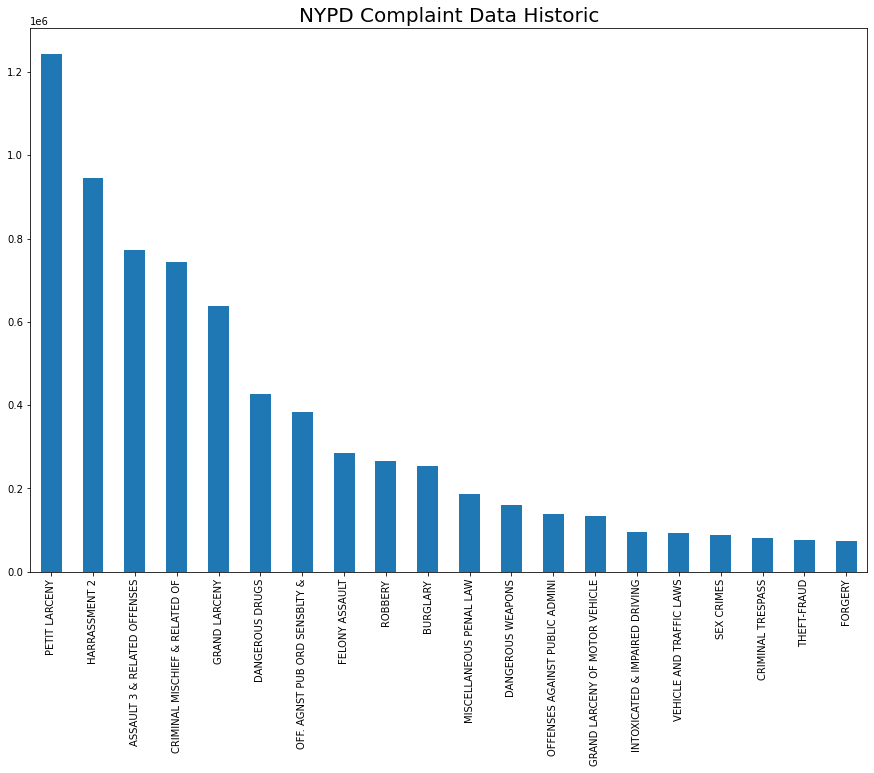

In [18]:
plt.rcParams['figure.figsize'] = (20, 9)

df_new['OFNS_DESC'].value_counts().head(20).plot.bar( figsize = (15, 10))
plt.title('NYPD Complaint Data Historic', fontweight = 30, fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [52]:
df_new.head()

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,OFNS_DESC,PD_DESC,LAW_CAT_CD,BORO_NM,...,SUSP_RACE,SUSP_SEX,Latitude,Longitude,Lat_Lon,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Complaint_date,Start year
0,394506329,12/31/2019,17:30:00,NaN,NaN,12/31/2019,DANGEROUS WEAPONS,WEAPONS POSSESSION 3,FELONY,MANHATTAN,...,NaN,NaN,40.820927,-73.943324,"(40.82092679700002, -73.94332421899996)",UNKNOWN,UNKNOWN,E,2019-12-31,2019.0
1,968873685,12/29/2019,16:31:00,12/29/2019,16:54:00,12/29/2019,FORGERY,"FORGERY,ETC.,UNCLASSIFIED-FELO",FELONY,BRONX,...,NaN,NaN,40.885701,-73.861640,"(40.885701406000074, -73.86164032499995)",UNKNOWN,UNKNOWN,E,2019-12-29,2019.0
2,509837549,12/15/2019,18:45:00,NaN,NaN,12/29/2019,HARRASSMENT 2,"HARASSMENT,SUBD 3,4,5",VIOLATION,QUEENS,...,UNKNOWN,M,40.742281,-73.819824,"(40.74228115600005, -73.81982408)",25-44,WHITE HISPANIC,F,2019-12-15,2019.0
3,352454313,12/28/2019,01:00:00,NaN,NaN,12/28/2019,MISCELLANEOUS PENAL LAW,RECKLESS ENDANGERMENT 1,FELONY,BRONX,...,BLACK,M,40.875311,-73.847545,"(40.87531145100007, -73.84754521099995)",UNKNOWN,UNKNOWN,E,2019-12-28,2019.0
5,293718737,12/27/2019,22:00:00,NaN,NaN,12/27/2019,BURGLARY,"BURGLARY,RESIDENCE,NIGHT",FELONY,MANHATTAN,...,NaN,NaN,40.720759,-73.980466,"(40.72075882100006, -73.98046642299995)",UNKNOWN,UNKNOWN,M,2019-12-27,2019.0


#### The age group of suspects will be plotted here 

<AxesSubplot:ylabel='SUSP_AGE_GROUP'>

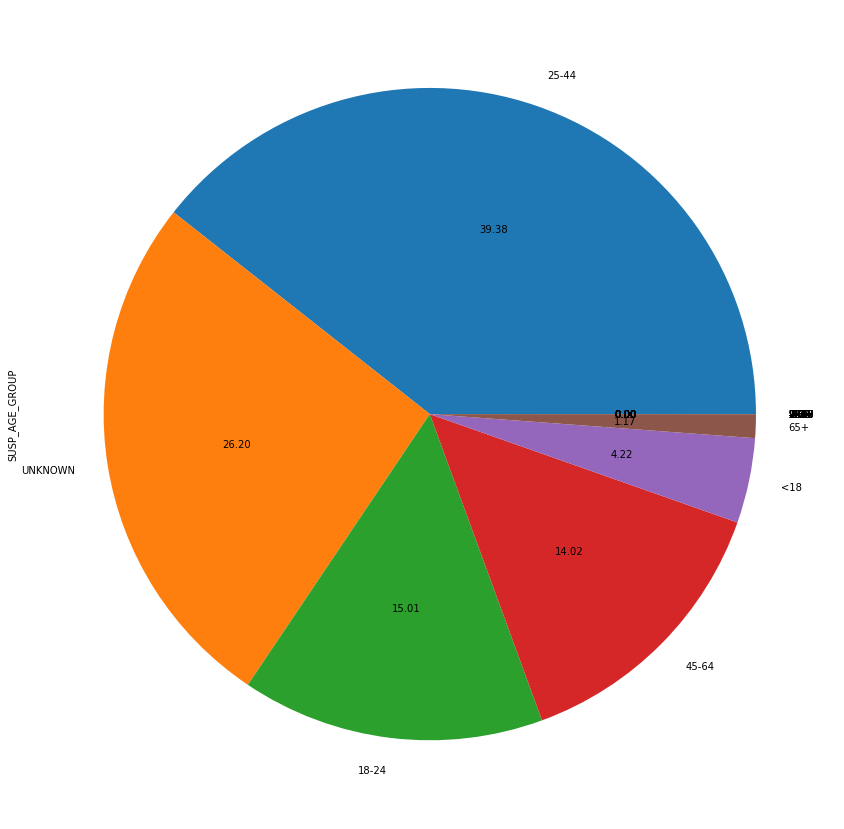

In [19]:
# df = df.groupby('SUSP_AGE_GROUP')['SUSP_AGE_GROUP'].sum()
#df = df.div(df.sum().astype(float)).round(2)*100
 #df
df_new['SUSP_AGE_GROUP'].value_counts().head(30).plot(kind = 'pie',autopct='%.2f',figsize=(15,15))

#### The suspect gender categori defined here 

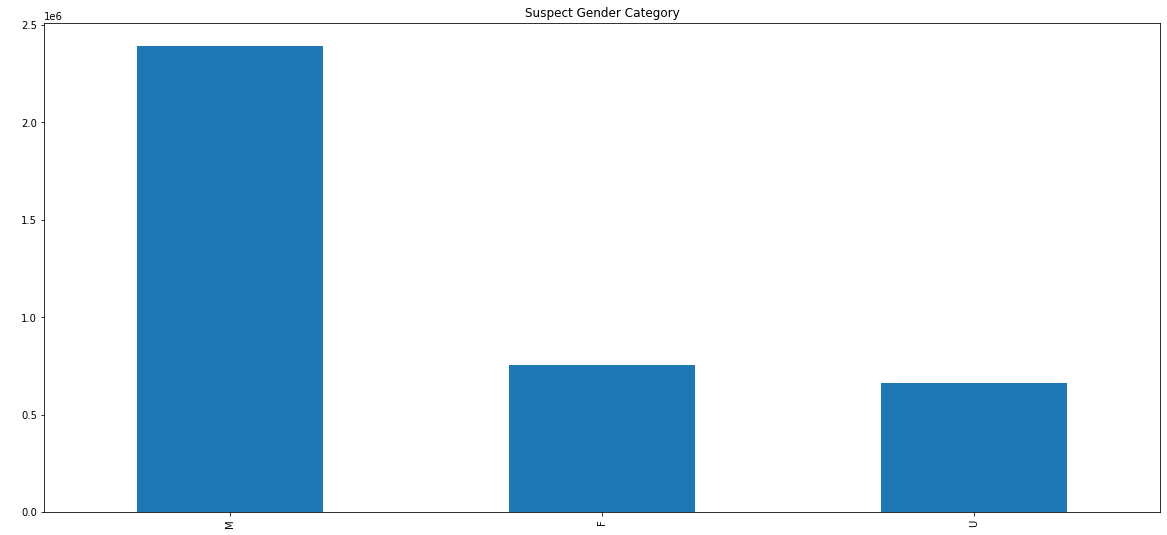

In [20]:
df_new['SUSP_SEX'].value_counts().plot.bar()
plt.title('Suspect Gender Category')
plt.ylabel(' ')
plt.show()

#### converting into the date time format 

In [42]:
df_new['Complaint_date']=pd.to_datetime(df_new['CMPLNT_FR_DT'],errors='coerce')


In [43]:
df_new['Start year']=df_new['Complaint_date'].dt.year

#### Checking the total count of years which are presented 

In [23]:
df_new['Start year'].value_counts()

2007.0    534043
2006.0    528507
2008.0    526871
2009.0    510178
2010.0    507682
           ...  
1929.0         1
1947.0         1
1956.0         1
1906.0         1
1951.0         1
Name: Start year, Length: 96, dtype: int64

####  Showing the start year 

In [45]:
df_new['Start year'].head(20)

0     2019.0
1     2019.0
2     2019.0
3     2019.0
5     2019.0
6     2019.0
7     2019.0
8     2019.0
9     2019.0
10    2019.0
11    2019.0
12    2019.0
14    2019.0
15    2019.0
16    2019.0
17    2019.0
18    2019.0
19    2019.0
20    2019.0
21    2019.0
Name: Start year, dtype: float64

#### Plotting the years range 

<AxesSubplot:>

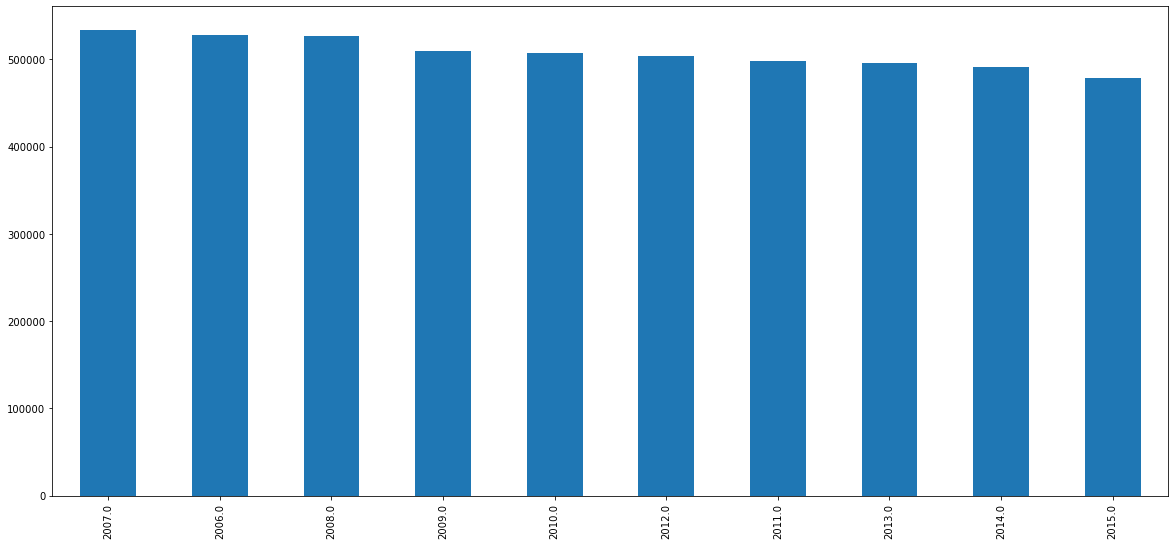

In [25]:
df_new['Start year'].value_counts().head(10).plot(kind='bar')

#### Here showing the Suspect race 

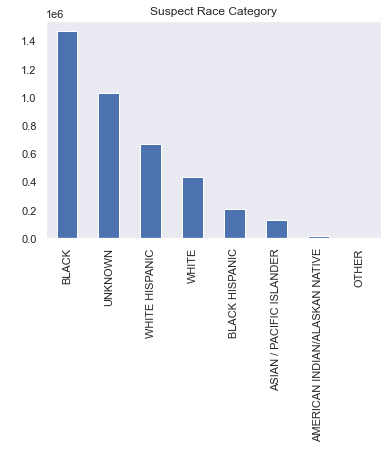

In [46]:
df_new['SUSP_RACE'].value_counts().plot.bar()
plt.title('Suspect Race Category')
plt.ylabel(' ')
plt.show()

### Note: Some columns of the data will need to be clean before modelling